In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd

In [60]:
%store -r final_df_2019_2023
%store -r final_df_with_Elo

In [61]:
final_df_2019_2023

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,...,HY,AY,HR,AR,HTP,ATP,HomeWin,AwayWin,Draw,Result
0,Milan,Udinese,4,2,H,14,9,5,4,5,...,1,4,0,0,3,0,1,0,0,HomeWin
1,Sampdoria,Atalanta,0,2,A,11,9,1,3,3,...,4,6,0,0,0,3,0,1,0,AwayWin
2,Lecce,Inter,1,2,A,10,19,4,9,6,...,4,2,0,0,0,3,0,1,0,AwayWin
3,Monza,Torino,1,2,A,15,13,4,6,2,...,1,2,0,0,0,3,0,1,0,AwayWin
4,Fiorentina,Cremonese,3,2,H,27,13,11,4,11,...,0,3,0,1,3,0,1,0,0,HomeWin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,Spal,Fiorentina,1,3,A,7,20,5,11,3,...,1,1,0,0,0,3,0,1,0,AwayWin
1516,Bologna,Torino,1,1,D,13,13,5,11,7,...,3,3,0,0,1,1,0,0,1,Draw
1517,Genoa,Verona,3,0,H,4,13,4,3,4,...,4,0,2,1,3,0,1,0,0,HomeWin
1518,Lecce,Parma,3,4,A,12,18,8,11,5,...,0,2,0,0,0,3,0,1,0,AwayWin


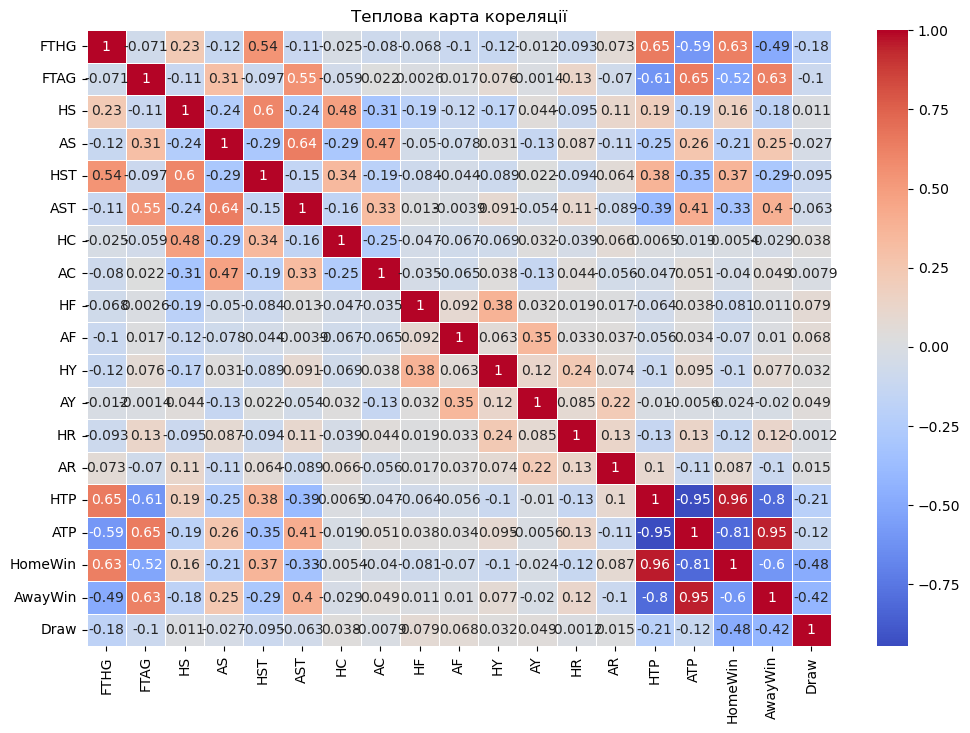

In [62]:
# Зробимо кореляційну матрицю та її теплову карту
correlation_matrix = final_df_2019_2023.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Теплова карта кореляції')
plt.show()

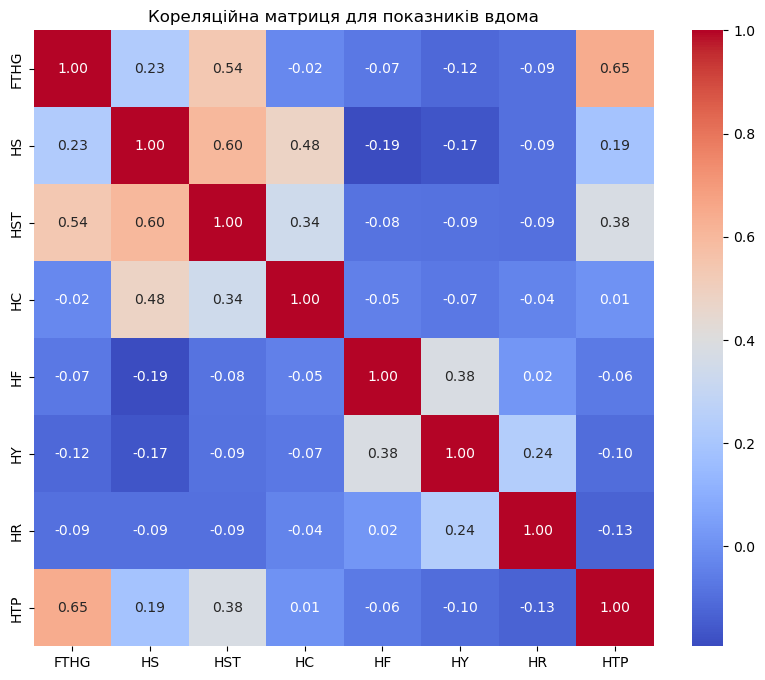

In [63]:
# Створення окремого датафрейму для показників вдома
home_data = final_df_2019_2023[['FTHG','HS', 'HST', 'HC', 'HF', 'HY', 'HR','HTP']]

# Побудова кореляційної матриці для показників вдома
home_correlation_matrix = home_data.corr()

# Відображення кореляційної матриці
plt.figure(figsize=(10, 8))
sns.heatmap(home_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Кореляційна матриця для показників вдома')
plt.show()

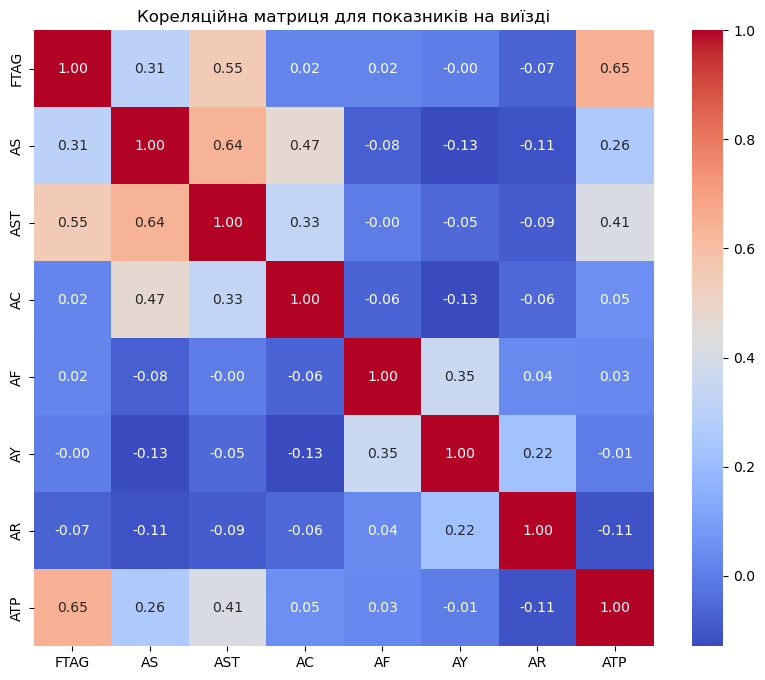

In [64]:
# Створення окремого датафрейму для показників для матчів на виїзді
home_data = final_df_2019_2023[['FTAG','AS', 'AST', 'AC', 'AF', 'AY', 'AR','ATP']]

# Побудова кореляційної матриці для показників вдома
home_correlation_matrix = home_data.corr()

# Відображення кореляційної матриці
plt.figure(figsize=(10, 8))
sns.heatmap(home_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Кореляційна матриця для показників на виїзді')
plt.show()

In [65]:
"""
Кореляція показників з кількістю набраних очок (HTP та ATP) може вказувати на те, 
які саме фактори найбільше впливають на результати команд. 
Якщо показники, такі як "FTHG", "HS", "HST", "AR", "FTAG", "AS", "AST", та "HR" мають високу кореляцію 
з кількістю набраних очок, то це означає, що вони можуть бути суттєвими факторами для визначення рейтингу команд.
"""

'\nКореляція показників з кількістю набраних очок (HTP та ATP) може вказувати на те, \nякі саме фактори найбільше впливають на результати команд. \nЯкщо показники, такі як "FTHG", "HS", "HST", "AR", "FTAG", "AS", "AST", та "HR" мають високу кореляцію \nз кількістю набраних очок, то це означає, що вони можуть бути суттєвими факторами для визначення рейтингу команд.\n'

In [66]:
# Тепер добавимо стовпці HomeWin, AwayWin, Draw - якщо умова виконалась - то 1
final_df_with_Elo['HomeWin'] = 0
final_df_with_Elo['AwayWin'] = 0
final_df_with_Elo['Draw'] = 0

def determine_result(row):
    if row['FTHG'] == row['FTAG']:
        return 'Draw'
    elif row['FTHG'] > row['FTAG']:
        return 'HomeWin'
    else:
        return 'AwayWin'

final_df_with_Elo['Result'] = final_df_with_Elo.apply(determine_result, axis=1)

result_dummies = pd.get_dummies(final_df_with_Elo['Result'])

final_df_with_Elo['HomeWin'] = result_dummies['HomeWin']
final_df_with_Elo['AwayWin'] = result_dummies['AwayWin']
final_df_with_Elo['Draw'] = result_dummies['Draw']

final_df_2019_2023 = final_df_with_Elo.drop(columns=['Result'])

final_df_2019_2023

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HC,...,AR,HTP,ATP,Team_x,HomeTeam_Elo_Rating,Team_y,AwayTeam_Elo_Rating,HomeWin,AwayWin,Draw
0,Milan,Udinese,4,2,H,14,9,5,4,5,...,0,3,0,Milan,1690.520913,Udinese,1493.953359,1,0,0
1,Sampdoria,Atalanta,0,2,A,11,9,1,3,3,...,0,0,3,Sampdoria,1473.860697,Atalanta,1713.554987,0,1,0
2,Lecce,Inter,1,2,A,10,19,4,9,6,...,0,0,3,Lecce,1405.828176,Inter,1740.246316,0,1,0
3,Monza,Torino,1,2,A,15,13,4,6,2,...,0,0,3,Monza,1519.566564,Torino,1429.219391,0,1,0
4,Fiorentina,Cremonese,3,2,H,27,13,11,4,11,...,1,3,0,Fiorentina,1531.211068,Cremonese,1405.181474,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,Spal,Fiorentina,1,3,A,7,20,5,11,3,...,0,0,3,Spal,1314.906722,Fiorentina,1531.211068,0,1,0
1516,Bologna,Torino,1,1,D,13,13,5,11,7,...,0,1,1,Bologna,1488.951320,Torino,1429.219391,0,0,1
1517,Genoa,Verona,3,0,H,4,13,4,3,4,...,1,3,0,Genoa,1470.127690,Verona,1490.815063,1,0,0
1518,Lecce,Parma,3,4,A,12,18,8,11,5,...,0,0,3,Lecce,1405.828176,Parma,1459.320992,0,1,0


In [67]:
final_df_2019_2023.to_csv('final_df_2019_2023.csv', index=False)

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Завантаження великого датасету з результатами ігор
matches_data = pd.read_csv('final_df_2019_2023.csv') 

# Визначення залежної та незалежних змінних для home
home_dependent_variable = 'HomeWin' 
home_independent_variables = ['FTHG', 'HS', 'HST', 'AR', 'HomeTeam_Elo_Rating', 'AwayTeam_Elo_Rating']

X_home = matches_data[home_independent_variables]
y_home = matches_data[home_dependent_variable]

X_home_train, X_home_test, y_home_train, y_home_test = train_test_split(X_home, y_home, test_size=0.2, random_state=42)

# Визначення залежної та незалежних змінних для нічиєї
draw_dependent_variable = 'Draw'
draw_independent_variables = ['FTHG', 'HS', 'HST', 'AR', 'HomeTeam_Elo_Rating', 'AwayTeam_Elo_Rating', 'FTAG', 'AS', 'AST', 'HR']

X_draw = matches_data[draw_independent_variables]
y_draw = matches_data[draw_dependent_variable]

# Розділення даних на навчальний і тестовий набори для нічиєї
X_draw_train, X_draw_test, y_draw_train, y_draw_test = train_test_split(X_draw, y_draw, test_size=0.2, random_state=42)

# Визначення залежної та незалежних змінних для перемоги гостьової команди
away_win_dependent_variable = 'AwayWin'
away_win_independent_variables = ['HomeTeam_Elo_Rating', 'AwayTeam_Elo_Rating', 'FTAG', 'AS', 'AST', 'HR']

X_away_win = matches_data[away_win_independent_variables]
y_away_win = matches_data[away_win_dependent_variable]

# Розділення даних на навчальний і тестовий набори для перемоги гостьової команди
X_away_win_train, X_away_win_test, y_away_win_train, y_away_win_test = train_test_split(X_away_win, y_away_win, test_size=0.2, random_state=42)

# Стандартизація даних для home win
scaler_home = StandardScaler()
X_home_train = scaler_home.fit_transform(X_home_train)
X_home_test = scaler_home.transform(X_home_test)

# Стандартизація даних для нічиєї
scaler_draw = StandardScaler()
X_draw_train = scaler_draw.fit_transform(X_draw_train)
X_draw_test = scaler_draw.transform(X_draw_test)

# Стандартизація даних для перемоги гостьової команди
scaler_away_win = StandardScaler()
X_away_win_train = scaler_away_win.fit_transform(X_away_win_train)
X_away_win_test = scaler_away_win.transform(X_away_win_test)

# Побудова та навчання моделі логістичної регресії home
model_home = LogisticRegression()
model_home.fit(X_home_train, y_home_train)

# Побудова та навчання моделі логістичної регресії для нічиєї
model_draw = LogisticRegression()
model_draw.fit(X_draw_train, y_draw_train)

# Побудова та навчання моделі логістичної регресії для перемоги гостьової команди
model_away_win = LogisticRegression()
model_away_win.fit(X_away_win_train, y_away_win_train)

# Прогнозування результатів home
y_home_pred = model_home.predict(X_home_test)

# Прогнозування результатів для нічиєї
y_draw_pred = model_draw.predict(X_draw_test)

# Прогнозування результатів для перемоги гостьової команди
y_away_win_pred = model_away_win.predict(X_away_win_test)

# Оцінка моделей
accuracy_home = accuracy_score(y_home_test, y_home_pred)
accuracy_draw = accuracy_score(y_draw_test, y_draw_pred)
accuracy_away_win = accuracy_score(y_away_win_test, y_away_win_pred)

conf_matrix_home = confusion_matrix(y_home_test, y_home_pred)
conf_matrix_draw = confusion_matrix(y_draw_test, y_draw_pred)
conf_matrix_away_win = confusion_matrix(y_away_win_test, y_away_win_pred)

class_report_home = classification_report(y_home_test, y_home_pred)
class_report_draw = classification_report(y_draw_test, y_draw_pred)
class_report_away_win = classification_report(y_away_win_test, y_away_win_pred)

print("Metrics for Home win:")
print(f'Accuracy: {accuracy_home}')
print(f'Confusion Matrix:\n{conf_matrix_home}')
print(f'Classification Report:\n{class_report_home}')

print("Metrics for Draw:")
print(f'Accuracy: {accuracy_draw}')
print(f'Confusion Matrix:\n{conf_matrix_draw}')
print(f'Classification Report:\n{class_report_draw}')

print("\nMetrics for AwayWin:")
print(f'Accuracy: {accuracy_away_win}')
print(f'Confusion Matrix:\n{conf_matrix_away_win}')
print(f'Classification Report:\n{class_report_away_win}')

Metrics for Home win:
Accuracy: 0.8256578947368421
Confusion Matrix:
[[150  21]
 [ 32 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       171
           1       0.83      0.76      0.79       133

    accuracy                           0.83       304
   macro avg       0.83      0.82      0.82       304
weighted avg       0.83      0.83      0.82       304

Metrics for Draw:
Accuracy: 0.7828947368421053
Confusion Matrix:
[[236   1]
 [ 65   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       237
           1       0.67      0.03      0.06        67

    accuracy                           0.78       304
   macro avg       0.73      0.51      0.47       304
weighted avg       0.76      0.78      0.70       304


Metrics for AwayWin:
Accuracy: 0.8322368421052632
Confusion Matrix:
[[182  18]
 [ 33  71]]
Classification Report:
     